In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Attendance

In [2]:
# read CSV file from URL
url = 'https://gist.githubusercontent.com/o0amandagomez0o/20c8edc2cb83d33da03c8fd2f9db4c4c/raw/attendance.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [4]:
df.columns = ['name', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8']
df

,name,d1,d2,d3,d4,d5,d6,d7,d8
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [5]:
df = df.melt(id_vars=['name'], var_name='day', value_name='attendance')
df

,name,day,attendance
0,Sally,d1,P
1,Jane,d1,A
2,Billy,d1,A
3,John,d1,P
4,Sally,d2,T
5,Jane,d2,P
6,Billy,d2,T
7,John,d2,T
8,Sally,d3,T
9,Jane,d3,T


In [6]:
# sort by 'name' column
df_sorted = df.sort_values('name')

In [7]:
df = df_sorted
df

,name,day,attendance
18,Billy,d5,H
2,Billy,d1,A
30,Billy,d8,T
14,Billy,d4,A
6,Billy,d2,T
26,Billy,d7,P
22,Billy,d6,T
10,Billy,d3,A
21,Jane,d6,T
13,Jane,d4,T


In [8]:
# create 'value' column based on 'attendance' values
attendance_map = {'H': 0.5, 'A': 0.0, 'P': 1.0, 'T': 0.9}
df['value'] = df['attendance'].map(attendance_map)

# print first 5 rows of the updated data table
df.head

<bound method NDFrame.head of      name day attendance  value
18  Billy  d5          H    0.5
2   Billy  d1          A    0.0
30  Billy  d8          T    0.9
14  Billy  d4          A    0.0
6   Billy  d2          T    0.9
26  Billy  d7          P    1.0
22  Billy  d6          T    0.9
10  Billy  d3          A    0.0
21   Jane  d6          T    0.9
13   Jane  d4          T    0.9
9    Jane  d3          T    0.9
25   Jane  d7          A    0.0
5    Jane  d2          P    1.0
29   Jane  d8          T    0.9
1    Jane  d1          A    0.0
17   Jane  d5          T    0.9
23   John  d6          T    0.9
27   John  d7          P    1.0
15   John  d4          P    1.0
31   John  d8          P    1.0
11   John  d3          H    0.5
7    John  d2          T    0.9
3    John  d1          P    1.0
19   John  d5          P    1.0
20  Sally  d6          A    0.0
16  Sally  d5          P    1.0
12  Sally  d4          H    0.5
24  Sally  d7          T    0.9
8   Sally  d3          T    0.9
4   Sally 

In [9]:
df.columns

Index(['name', 'day', 'attendance', 'value'], dtype='object')

In [10]:
# drop 'day' and 'attendance' columns
df = df.drop(['day', 'attendance'], axis = 1)
df.head()

,name,value
18,Billy,0.5
2,Billy,0.0
30,Billy,0.9
14,Billy,0.0
6,Billy,0.9


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 18 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    32 non-null     object 
 1   value   32 non-null     float64
dtypes: float64(1), object(1)
memory usage: 768.0+ bytes


In [12]:
# group by 'name' and sum the 'value' column
df = df.groupby('name')['value'].sum()
df

name
Billy    4.2
Jane     5.5
John     7.3
Sally    6.1
Name: value, dtype: float64

### 2. Coffee Levels

In [2]:
url = 'https://gist.githubusercontent.com/o0amandagomez0o/f6ea956fedae90420fd2ce4bd382ea8a/raw/coffee_levels.csv'
dfc = pd.read_csv(url)

In [3]:
dfc

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291
5,13,x,0.310711
6,14,x,0.507288
7,15,x,0.215043
8,16,x,0.183891
9,17,x,0.391560


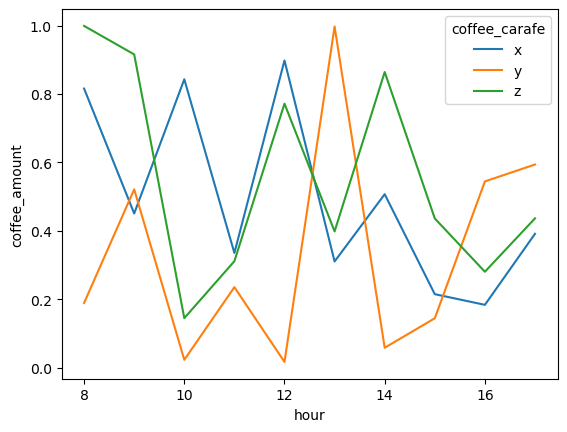

In [4]:
sns.lineplot(data=dfc, x='hour', y='coffee_amount', hue='coffee_carafe')
plt.show()

### Recall: pd.pivot arguments

* Index = columns you want to keep (not pivot)
* columns = column you want to pivot
* values = values we want to populate in the new columns

In [5]:
dfc.pivot(index='hour',
            columns='coffee_carafe',
            values='coffee_amount')

coffee_carafe,x,y,z
hour,,,
8,0.816164,0.189297,0.999264
9,0.451018,0.521502,0.915990
10,0.843279,0.023163,0.144928
11,0.335533,0.235529,0.311495
12,0.898291,0.017009,0.771947
13,0.310711,0.997464,0.398520
14,0.507288,0.058361,0.864464
15,0.215043,0.144644,0.436364
16,0.183891,0.544676,0.280621


In [6]:
dfc = dfc.pivot(index='hour',
            columns='coffee_carafe',
            values='coffee_amount')

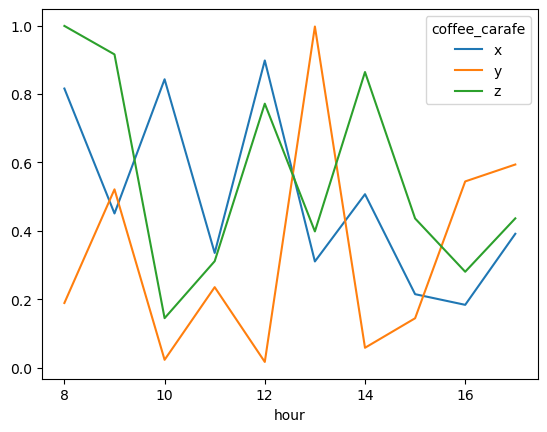

In [7]:
dfc.plot()
plt.show()

### 2c. Is this the best shape for the data?

* It depends

* If it's going to be loaded into a database, clp has the best structure as each observation is representing the coffee levels for each carafe per hour

* Although if you are exploring the data, cl is easier to manipulate:

In [8]:
pd.DataFrame(dfc.groupby('coffee_carafe').coffee_amount.mean())

KeyError: 'coffee_carafe'

### 3. Cake Recipes

In [9]:
url = 'https://gist.githubusercontent.com/o0amandagomez0o/6bb870ddd6cae613999b9cf33ac41c33/raw/cake_recipes.csv'
dfr = pd.read_csv(url)

In [10]:
dfr

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


In [11]:
dfr = dfr.melt(id_vars='recipe:position', var_name='temp', value_name='score')

In [12]:
dfr

,recipe:position,temp,score
0,a:bottom,225,61.738655
1,a:top,225,51.709751
2,b:bottom,225,57.095320
3,b:top,225,82.455004
4,c:bottom,225,96.470207
5,c:top,225,71.306308
6,d:bottom,225,52.799753
7,d:top,225,96.873178
8,a:bottom,250,53.912627
9,a:top,250,52.009735


In [13]:
dfr[['recipe','position']] = dfr['recipe:position'].str.split(':', expand=True)

In [14]:
dfr = dfr.drop(columns='recipe:position')

In [15]:
dfr

,temp,score,recipe,position
0,225,61.738655,a,bottom
1,225,51.709751,a,top
2,225,57.095320,b,bottom
3,225,82.455004,b,top
4,225,96.470207,c,bottom
5,225,71.306308,c,top
6,225,52.799753,d,bottom
7,225,96.873178,d,top
8,250,53.912627,a,bottom
9,250,52.009735,a,top


### Which recipe, on average, is best?

In [16]:
dfr.groupby('recipe').mean()

/var/folders/cq/k4_shrmd3jqcmhl3902xm04r0000gn/T/ipykernel_88596/1641665423.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfr.groupby('recipe').mean()


,score
recipe,
a,63.922201
b,76.736074
c,75.874748
d,62.864844


In [17]:
dfr.groupby('recipe').mean().idxmax()

/var/folders/cq/k4_shrmd3jqcmhl3902xm04r0000gn/T/ipykernel_88596/2982914196.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfr.groupby('recipe').mean().idxmax()


score    b
dtype: object

In [18]:
dfr.groupby('recipe').mean().max()

/var/folders/cq/k4_shrmd3jqcmhl3902xm04r0000gn/T/ipykernel_88596/510328242.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfr.groupby('recipe').mean().max()


score    76.736074
dtype: float64

### 3d. Which oven temperature, on average, produces the best results?

In [19]:
dfr.groupby('temp').mean()

/var/folders/cq/k4_shrmd3jqcmhl3902xm04r0000gn/T/ipykernel_88596/2514826915.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfr.groupby('temp').mean()


,score
temp,
225,71.306022
250,66.577437
275,74.886754
300,66.627655


In [20]:
dfr.groupby('temp').mean().idxmax()

/var/folders/cq/k4_shrmd3jqcmhl3902xm04r0000gn/T/ipykernel_88596/3360988199.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfr.groupby('temp').mean().idxmax()


score    275
dtype: object

In [21]:
dfr.groupby('temp').mean().sort_values('score').tail(1)

/var/folders/cq/k4_shrmd3jqcmhl3902xm04r0000gn/T/ipykernel_88596/4271989192.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfr.groupby('temp').mean().sort_values('score').tail(1)


,score
temp,
275,74.886754


### 3e. Which combination of recipe, rack position, and temperature gives the best result?

In [22]:
dfr.groupby(['recipe','position','temp']).mean()

score
recipe position temp           
a      bottom   225   61.738655
                250   53.912627
                275   74.414730
                300   98.786784
       top      225   51.709751
                250   52.009735
                275   68.576858
                300   50.228470
b      bottom   225   57.095320
                250   61.904369
                275   61.196980
                300   99.248541
       top      225   82.455004
                250   95.224151
                275   98.594881
                300   58.169349
c      bottom   225   96.470207
                250   52.001358
                275   92.893227
                300   65.473084
       top      225   71.306308
                250   82.795477
                275   92.098049
                300   53.960273
d      bottom   225   52.799753
                250   58.670419
                275   51.747686
                300   56.183110
       top      225   96.873178
                250   76.101363
                275   59.571620
                300   50.971626

In [23]:
dfr.groupby(['recipe','position','temp']).mean().idxmax()

score    (b, bottom, 300)
dtype: object

In [24]:
dfr.groupby(['recipe','position','temp']).mean().sort_values('score').tail(1)

,,,score
recipe,position,temp,
b,bottom,300,99.248541
